## Instalarea bibliotecii mediapipe

In [1]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.7 which is incompatibl

## Odata instalata, mediapipe intra in conflict cu o parte din bibliotecile existente, acestea trebuie reinstalate

In [1]:
!pip install --upgrade --force-reinstall numpy
!pip install --upgrade --force-reinstall tensorflow
!pip install --upgrade --force-reinstall mediapipe

  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.21 requires numpy<2, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.19.0 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.19.0 which is incompa

  Using cached mediapipe-0.10.21-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (9.7 kB)
  Using cached absl_py-2.2.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached attrs-25.3.0-py3-none-any.whl.metadata (10 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached jax-0.6.0-py3-none-any.whl.metadata (22 kB)
  Using cached jaxlib-0.6.0-cp311-cp311-manylinux2014_x86_64.whl.metadata (1.2 kB)
  Using cached matplotlib-3.10.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached opencv_contrib_python-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached protobuf-4.25.7-cp37-abi3-manylinux2014_x86_64.whl.metadata (541 bytes)
  Using cached sounddevice-0.5.1-py3-none-any.whl.metadata (1.4 kB)
  Using cached sentencepiece-0.2.0-cp311-cp311-manylinux_2_17_x86_64.manylinu

In [1]:
import google.colab
google.colab.drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
model_dir = '/content/gdrive/MyDrive/Facultate Informatica/Profesor/2024 - 2025/Sisteme expert si metode biometrice in securitatea informatiei/Curs/ColabMount/Models/Landmarks'

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from google.colab import files
from IPython.display import display
from google.colab.patches import cv2_imshow

/usr/local/lib/python3.11/dist-packages/jaxlib/plugin_support.py:71: RuntimeWarning: JAX plugin jax_cuda12_plugin version 0.5.1 is installed, but it is not compatible with the installed jaxlib version 0.6.0, so it will not be used.
  warnings.warn(


In [4]:
if os.path.isdir(model_dir):
  print("Model directory exists")

else:
  print("Model directory does not exist")

model_file_path = os.path.join(model_dir, 'pose_landmarker.task')

Model directory exists


## Functe care detecteaza orientarea

Detectează direcția în care se uită o persoană pe baza pozițiilor orizontale relative ale punctelor-cheie din corp.


Returnează:
Un șir de caractere care indică direcția în care este orientată persoana:
- "Se uită în față"
- "Se uită spre stânga"
- "Se uită spre dreapta"
- "Se uită cu spatele"

Logica:
- Calculează poziția medie orizontală dintre ambii umeri și ambii șolduri.
- Compară poziția nasului față de acel centru pentru a determina orientarea:
    - Dacă nasul este aproape centrat → persoana se uită în față.
    - Dacă nasul este în stânga centrului → se uită spre stânga.
    - Dacă nasul este în dreapta → se uită spre dreapta.
    - Dacă umerii și șoldurile sunt aliniați vertical → posibil se uită cu spatele.


In [5]:
def detect_facing_direction(pose_landmarks):
    """
    Detect the direction a person is facing based on the relative horizontal positions of key landmarks.

    Args:
        pose_landmarks: List of pose landmarks detected by Mediapipe.

    Returns:
        A string indicating the direction the person is facing:
        "Facing Forward", "Facing Left", "Facing Right", or "Facing Backwards".
    """
    # Get the landmarks for shoulders, hips, and nose
    left_shoulder = pose_landmarks[11]  # Left shoulder landmark
    right_shoulder = pose_landmarks[12]  # Right shoulder landmark
    left_hip = pose_landmarks[23]  # Left hip landmark
    right_hip = pose_landmarks[24]  # Right hip landmark
    nose = pose_landmarks[0]  # Nose landmark

    # Calculate the horizontal midpoint between the shoulders and hips
    shoulder_mid_x = (left_shoulder.x + right_shoulder.x) / 2
    hip_mid_x = (left_hip.x + right_hip.x) / 2

    # Check if the nose is roughly aligned with the midpoint of the shoulders
    if abs(nose.x - shoulder_mid_x) < 0.1:  # Adjust the threshold as needed
        return "Facing Forward"

    # Check if the nose is to the left or right of the shoulder midpoint
    elif nose.x < shoulder_mid_x:
        return "Facing Left"
    elif nose.x > shoulder_mid_x:
        return "Facing Right"

    # Check if the shoulders and hips are aligned horizontally (backwards)
    if abs(left_shoulder.x - left_hip.x) < 0.1 and abs(right_shoulder.x - right_hip.x) < 0.1:
        return "Facing Backwards"

    return "Unknown"




## Functie care detecteaza activitatea

Funcția `detect_activity` determină activitatea unei persoane pe baza pozițiilor șoldurilor și genunchilor.

#### Argumente:
- **`pose_landmarks`**: O listă de repere (landmark-uri) corporale detectate de Mediapipe, care includ șoldurile și genunchii.

#### Returnează:
- Un șir de caractere care indică activitatea curentă a persoanei:
  - **"Sitting"** (Se află pe scaun) dacă poziția medie a șoldurilor este mai jos decât genunchii (indică o poziție de șezut).
  - **"Standing"** (Se află în picioare) dacă genunchii sunt mai jos decât șoldurile (indică o poziție de stat în picioare).

#### Logica funcției:
- Funcția calculează distanța verticală medie dintre șolduri și genunchi.
- Dacă șoldurile sunt mai jos decât genunchii, se presupune că persoana stă jos. În caz contrar, se presupune că stă în picioare.

In [6]:
def detect_activity(pose_landmarks):
    # Example: Check if the person is sitting based on hip and knee positions
    left_hip = pose_landmarks[23]  # Left hip landmark
    right_hip = pose_landmarks[24]  # Right hip landmark
    left_knee = pose_landmarks[25]  # Left knee landmark
    right_knee = pose_landmarks[26]  # Right knee landmark

    # Calculate the vertical distance between hips and knees
    avg_hip_y = (left_hip.y + right_hip.y) / 2
    avg_knee_y = (left_knee.y + right_knee.y) / 2

    if avg_hip_y > avg_knee_y:  # Hips are lower than knees
        return "Sitting"
    else:
        return "Standing"





## Descrierea funcției `detect_hands_position`

Funcția `detect_hands_position` detectează dacă mâinile sunt ridicate sau coborâte pe baza pozițiilor încheieturilor și umerilor.

#### Argumente:
- **`pose_landmarks`**: O listă de repere (landmark-uri) corporale detectate de Mediapipe, care includ umerii și încheieturile.

#### Returnează:
- Un șir de caractere care indică poziția mâinilor:
  - **"Hands Raised"** (Mâinile ridicate) dacă ambele încheieturi sunt deasupra umerilor.
  - **"Hands Lowered"** (Mâinile coborâte) dacă ambele încheieturi sunt sub umerilor.
  - **"Unknown"** (Necunoscut) dacă încheieturile sunt într-o poziție mixtă (unele ridicate și altele coborâte).

#### Logica funcției:
- Funcția calculează coordonata y medie a umerilor.
- Dacă ambele încheieturi sunt mai sus decât umărul, se presupune că mâinile sunt ridicate.
- Dacă ambele încheieturi sunt mai jos decât umărul, se presupune că mâinile sunt coborâte.

In [7]:
def detect_hands_position(pose_landmarks):
    """
    Detect if hands are raised or lowered based on wrist and shoulder positions.

    Args:
        pose_landmarks: List of pose landmarks detected by Mediapipe.

    Returns:
        A string indicating the position of the hands: "Hands Raised", "Hands Lowered", or "Unknown".
    """
    # Get the landmarks for shoulders and wrists
    left_shoulder = pose_landmarks[11]  # Left shoulder landmark
    right_shoulder = pose_landmarks[12]  # Right shoulder landmark
    left_wrist = pose_landmarks[15]  # Left wrist landmark
    right_wrist = pose_landmarks[16]  # Right wrist landmark

    # Calculate the average y-coordinate of the shoulders
    avg_shoulder_y = (left_shoulder.y + right_shoulder.y) / 2

    # Check if both wrists are above the shoulders
    if left_wrist.y < avg_shoulder_y and right_wrist.y < avg_shoulder_y:
        return "Hands Raised"
    # Check if both wrists are below the shoulders
    elif left_wrist.y > avg_shoulder_y and right_wrist.y > avg_shoulder_y:
        return "Hands Lowered"
    else:
        return "Unknown"

### Descrierea funcției `detect_lying_down`

Funcția `detect_lying_down` determină dacă o persoană este întinsă pe jos pe baza pozițiilor verticale relative ale unor repere cheie.

#### Argumente:
- **`pose_landmarks`**: O listă de repere (landmark-uri) corporale detectate de Mediapipe, care includ umerii, șoldurile și picioarele.

#### Returnează:
- Un șir de caractere care indică dacă persoana este întinsă:
  - **"Lying Down"** (Întins pe jos) dacă umerii, șoldurile și picioarele sunt aliniate aproape orizontal.
  - **"Not Lying Down"** (Nu este întins pe jos) dacă reperele nu sunt aliniate orizontal.

#### Logica funcției:
- Funcția calculează coordonatele medii pe axa y pentru umeri, șolduri și picioare.
- Dacă diferențele dintre pozițiile verticale ale umerilor, șoldurilor și picioarelor sunt foarte mici (mai mici de 0.1), se consideră că persoana este întinsă pe jos.


In [8]:
def detect_lying_down(pose_landmarks):
    """
    Detect if a person is lying down based on the relative vertical positions of key landmarks.

    Args:
        pose_landmarks: List of pose landmarks detected by Mediapipe.

    Returns:
        A string indicating whether the person is "Lying Down" or "Not Lying Down".
    """
    # Get the landmarks for shoulders, hips, and feet
    left_shoulder = pose_landmarks[11]  # Left shoulder landmark
    right_shoulder = pose_landmarks[12]  # Right shoulder landmark
    left_hip = pose_landmarks[23]  # Left hip landmark
    right_hip = pose_landmarks[24]  # Right hip landmark
    left_foot = pose_landmarks[31]  # Left foot landmark
    right_foot = pose_landmarks[32]  # Right foot landmark

    # Calculate the average y-coordinates for shoulders, hips, and feet
    avg_shoulder_y = (left_shoulder.y + right_shoulder.y) / 2
    avg_hip_y = (left_hip.y + right_hip.y) / 2
    avg_foot_y = (left_foot.y + right_foot.y) / 2

    # Check if the shoulders, hips, and feet are roughly aligned horizontally
    if abs(avg_shoulder_y - avg_hip_y) < 0.1 and abs(avg_hip_y - avg_foot_y) < 0.1:
        return "Lying Down"
    else:
        return "Not Lying Down"


In [15]:
print("Incarcati o imagine de test")
uploaded_test_image = files.upload()  # Allows user to upload a file
# Get the first uploaded file
uploaded_test_image_path = list(uploaded_test_image.keys())[0]

Incarcati o imagine de test


Saving pexels-anastasia-shuraeva-7664137_small.jpg to pexels-anastasia-shuraeva-7664137_small.jpg


In [16]:
base_options = python.BaseOptions(model_asset_path=model_file_path)
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True,
    num_poses=10)
detector = vision.PoseLandmarker.create_from_options(options)


In [17]:
mp_image = mp.Image.create_from_file(uploaded_test_image_path)

# run the mode and extract the data
detection_result = detector.detect(mp_image)
pose_landmarks_list = detection_result.pose_landmarks
segmentation_masks = detection_result.segmentation_masks


In [18]:
annotated_image = np.copy(mp_image.numpy_view()) # Convert mp_image to NumPy array

for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())

annotated_image_pil = Image.fromarray(annotated_image)


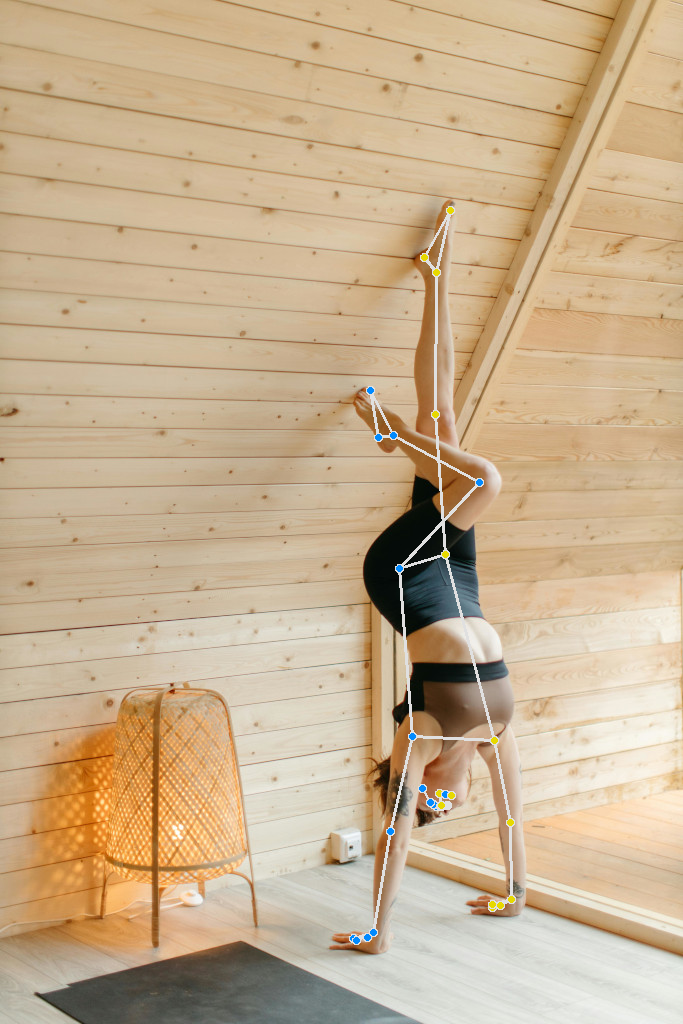

In [19]:
display(annotated_image_pil)

In [20]:
for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Detect activity, hands position, and lying status for each person
    sitting = detect_activity(pose_landmarks)
    hands_position = detect_hands_position(pose_landmarks)
    lying_down = detect_lying_down(pose_landmarks)
    facing_direction = detect_facing_direction(pose_landmarks)

    # Prepare the text to overlay
    print( f"Sitting: {sitting}\nHands: {hands_position}\nLying: {lying_down} \nFacing direction: {facing_direction}")



Sitting: Sitting
Hands: Hands Lowered
Lying: Not Lying Down 
Facing direction: Facing Forward
